# Array vs linked list

In [1]:
import numpy as np
from collections import deque
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def doPlot(x, y, label=None):
    plt.loglog(x, y, '-o', linewidth=0.95)
    plt.grid(True)

In [3]:
N_bank = np.logspace(2, 9, 20, dtype=np.int)
print(N_bank)

[       100        233        545       1274       2976       6951
      16237      37926      88586     206913     483293    1128837
    2636650    6158482   14384498   33598182   78475997  183298071
  428133239 1000000000]


In [4]:
dt_a1 = []
dt_a2 = []
dt_l1 = []
dt_l2 = []

n = 3

for (k, N) in enumerate(N_bank):
    print("Processing k={}, N={}".format(k, N))
    a = np.empty(N, dtype=np.int8)

    dt = %timeit -o -q a[N//2]
    dt_a1.append(dt)
    
    dt = %timeit -o -q np.append(a, -99)
    dt_a2.append(dt)

    del a
    l = deque([None] * N)

    dt = %timeit -o -q l[N//2]
    dt_l1.append(dt)
    
    dt = %timeit -o -q l.append(-99)
    dt_l2.append(dt)

    del l


Processing k=0, N=100
Processing k=1, N=233
Processing k=2, N=545
Processing k=3, N=1274
Processing k=4, N=2976
Processing k=5, N=6951
Processing k=6, N=16237
Processing k=7, N=37926
Processing k=8, N=88586
Processing k=9, N=206913
Processing k=10, N=483293
Processing k=11, N=1128837
Processing k=12, N=2636650
Processing k=13, N=6158482
Processing k=14, N=14384498
Processing k=15, N=33598182
Processing k=16, N=78475997
Processing k=17, N=183298071
Processing k=18, N=428133239
Processing k=19, N=1000000000


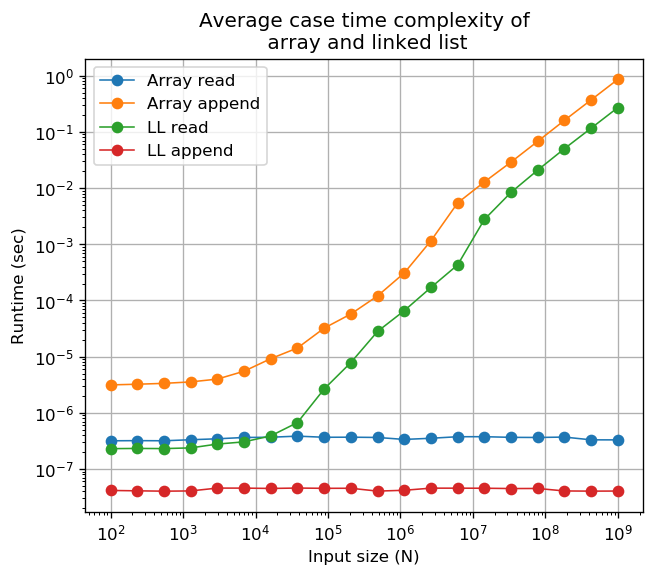

In [5]:
fig = plt.figure(figsize=(6,5),dpi=120)
axes = fig.add_subplot(111)
doPlot(N_bank, [D.best for D in dt_a1])
doPlot(N_bank, [D.best for D in dt_a2])
doPlot(N_bank, [D.best for D in dt_l1])
doPlot(N_bank, [D.best for D in dt_l2])
plt.legend(("Array read", "Array append", "LL read", "LL append", ));
plt.xlabel("Input size (N)");
plt.ylabel("Runtime (sec)");
plt.title("Average case time complexity of\n array and linked list");